In [2]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('innercity.csv')

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [5]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440
21612,6413600276,20150324T000000,354950,3,1.00,970,5922,1.5,0,0,...,0,1949,0,98125,47.7190,-122.321,1730,6128,0,6892


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [7]:
df.nunique()

cid                 21436
dayhours              372
price                3625
room_bed               13
room_bath              30
living_measure       1038
lot_measure          9782
ceil                    6
coast                   2
sight                   5
condition               5
quality                12
ceil_measure          946
basement              306
yr_built              116
yr_renovated           70
zipcode                70
lat                  5034
long                  752
living_measure15      777
lot_measure15        8689
furnished               2
total_area          11163
dtype: int64

In [8]:
df.shape

(21613, 23)

In [9]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06


In [10]:
df.corr()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
cid,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.010009,-0.131844
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,...,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.565991,0.104796
room_bed,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.259268,0.044310
room_bath,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.484923,0.104050
living_measure,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.632947,0.194209
lot_measure,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.118883,0.999763
ceil,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.347749,0.002637
coast,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.069882,0.023809
sight,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220250,0.080693
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.121902,-0.010219


In [11]:
df['DateTime'] = pd.to_datetime(df['dayhours'])
df1=df.drop('dayhours',axis=1)
df1['Age']=df['DateTime'].dt.year-df['yr_built']

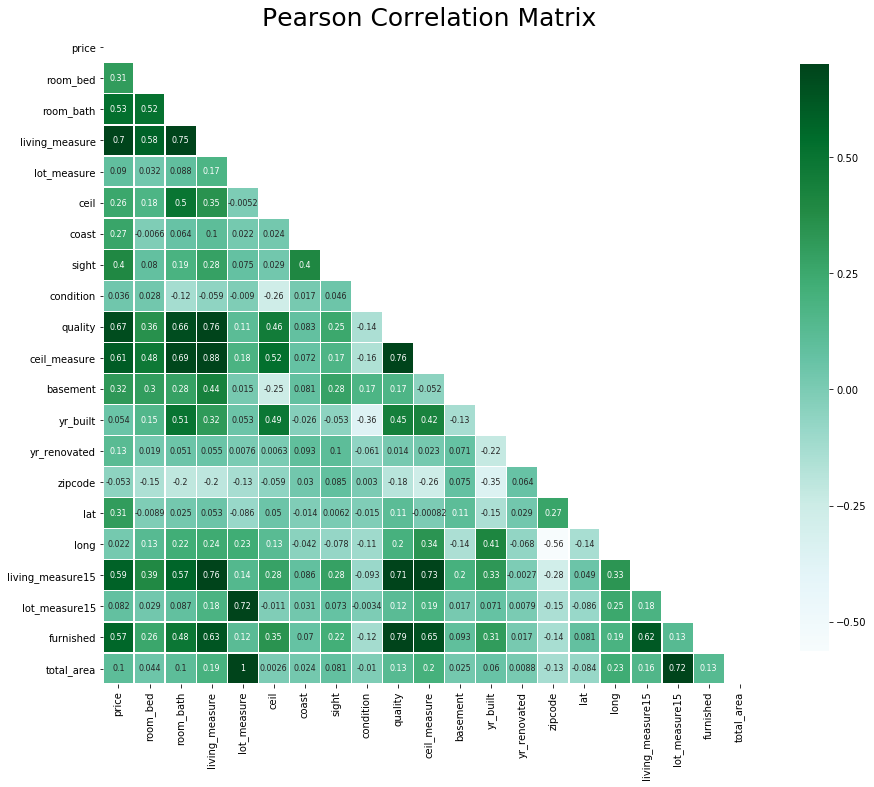

In [12]:
features=[ 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area']
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

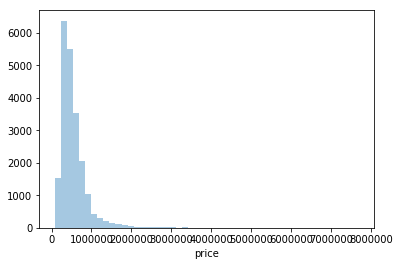

In [13]:
sns.distplot(df1['price'], bins=50, kde=False);

In [14]:
filtered_df = df1[(df1['room_bed']<=0)]
filtered_df

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,DateTime,Age
1640,2569500210,339950,0,2.50,2290,8319,2.0,0,0,3,...,0,98042,47.3473,-122.151,2500,8751,0,10609,2014-11-17,29
1932,2954400190,1300000,0,0.00,4810,28008,2.0,0,0,3,...,0,98053,47.6642,-122.069,4740,35061,1,32818,2014-06-24,24
7317,3918400017,380000,0,0.00,1470,979,3.0,0,2,3,...,0,98133,47.7145,-122.356,1470,1399,0,2449,2015-02-05,9
8092,3980300371,142000,0,0.00,290,20875,1.0,0,0,1,...,0,98024,47.5308,-121.888,1620,22850,0,21165,2014-09-26,51
9884,9543000205,139950,0,0.00,844,4269,1.0,0,0,4,...,0,98001,47.2781,-122.250,1380,9600,0,5113,2015-04-13,102
11500,1453602309,288000,0,1.50,1430,1650,3.0,0,0,3,...,0,98125,47.7222,-122.290,1430,1650,0,3080,2014-08-05,15
13422,2310060040,240000,0,2.50,1810,5669,2.0,0,0,3,...,0,98038,47.3493,-122.053,1810,5685,0,7479,2014-09-25,11
14831,3374500520,355000,0,0.00,2460,8049,2.0,0,0,3,...,0,98031,47.4095,-122.168,2520,8050,0,10509,2015-04-29,25
15102,6896300380,228000,0,1.00,390,5900,1.0,0,0,2,...,0,98118,47.5260,-122.261,2170,6000,0,6290,2014-10-02,61
15806,1222029077,265000,0,0.75,384,213444,1.0,0,0,3,...,0,98070,47.4177,-122.491,1920,224341,0,213828,2014-10-29,11


In [15]:
filtered_df1 = df1[(df1['room_bath']<=0)]
filtered_df1

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,DateTime,Age
1540,5702500050,280000,1,0.0,600,24501,1.0,0,0,2,...,0,98045,47.5316,-121.749,990,22549,0,25101,2014-11-04,64
1932,2954400190,1300000,0,0.0,4810,28008,2.0,0,0,3,...,0,98053,47.6642,-122.069,4740,35061,1,32818,2014-06-24,24
7317,3918400017,380000,0,0.0,1470,979,3.0,0,2,3,...,0,98133,47.7145,-122.356,1470,1399,0,2449,2015-02-05,9
8092,3980300371,142000,0,0.0,290,20875,1.0,0,0,1,...,0,98024,47.5308,-121.888,1620,22850,0,21165,2014-09-26,51
8196,3421079032,75000,1,0.0,670,43377,1.0,0,0,3,...,0,98022,47.2638,-121.906,1160,42882,0,44047,2015-02-17,49
9884,9543000205,139950,0,0.0,844,4269,1.0,0,0,4,...,0,98001,47.2781,-122.250,1380,9600,0,5113,2015-04-13,102
14831,3374500520,355000,0,0.0,2460,8049,2.0,0,0,3,...,0,98031,47.4095,-122.168,2520,8050,0,10509,2015-04-29,25
15960,7849202190,235000,0,0.0,1470,4800,2.0,0,0,3,...,0,98065,47.5265,-121.828,1060,7200,0,6270,2014-12-23,18
19216,6306400140,1100000,0,0.0,3064,4764,3.5,0,2,3,...,0,98102,47.6362,-122.322,2360,4000,0,7828,2014-06-12,24
19546,203100435,484000,1,0.0,690,23244,1.0,0,0,4,...,0,98053,47.6429,-121.955,1690,19290,0,23934,2014-09-18,66


In [16]:
filtered_df2 = df1[(df1['room_bed']>=33)]
filtered_df2

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,DateTime,Age
750,2402100895,640000,33,1.75,1620,6000,1.0,0,0,5,...,0,98103,47.6878,-122.331,1330,4700,0,7620,2014-06-25,67


In [17]:
df1.loc[df1.yr_renovated == 0, 'renov_flg'] = 0 
df1.loc[df1.yr_renovated > 0 , 'renov_flg'] = 1


In [18]:
df1['renov_flg'].value_counts()

0.0    20699
1.0      914
Name: renov_flg, dtype: int64

In [19]:
df1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,DateTime,Age,renov_flg
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,...,98133,47.7174,-122.336,2120,7553,1,16477,2014-11-07,58,0.0
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,...,98023,47.3165,-122.386,2260,8800,0,10050,2014-12-04,38,0.0
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,...,98038,47.3515,-121.999,2370,4348,0,6694,2015-04-20,9,0.0
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,...,98133,47.7049,-122.349,1520,3844,0,4664,2014-05-29,98,0.0
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,...,98115,47.6768,-122.269,1900,5940,0,5450,2015-04-24,61,0.0


In [20]:
df1['transaction_month'] = df1['DateTime'].dt.month

In [21]:
df1['transaction_year'] = df1['DateTime'].dt.year

In [22]:
df1['transaction_date'] = df1['DateTime'].dt.day

In [23]:
df1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,living_measure15,lot_measure15,furnished,total_area,DateTime,Age,renov_flg,transaction_month,transaction_year,transaction_date
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,...,2120,7553,1,16477,2014-11-07,58,0.0,11,2014,7
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,...,2260,8800,0,10050,2014-12-04,38,0.0,12,2014,4
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,...,2370,4348,0,6694,2015-04-20,9,0.0,4,2015,20
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,...,1520,3844,0,4664,2014-05-29,98,0.0,5,2014,29
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,...,1900,5940,0,5450,2015-04-24,61,0.0,4,2015,24


In [24]:
corr_matrix = df1.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
living_measure       0.702044
quality              0.667463
ceil_measure         0.605566
living_measure15     0.585374
furnished            0.565991
room_bath            0.525134
sight                0.397346
basement             0.323837
room_bed             0.308338
lat                  0.306919
coast                0.266331
ceil                 0.256786
yr_renovated         0.126442
renov_flg            0.126101
total_area           0.104796
lot_measure          0.089655
lot_measure15        0.082456
yr_built             0.053982
condition            0.036392
long                 0.021571
transaction_year     0.003554
transaction_month   -0.010053
transaction_date    -0.014669
cid                 -0.016797
zipcode             -0.053168
Age                 -0.053921
Name: price, dtype: float64

In [25]:
df1['price_per_sqft'] = df1['price']/df1['living_measure']

In [26]:
freq = df1.groupby('zipcode').count()['cid']
mean = df1.groupby('zipcode').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft,neighborhood
count,70.000000,70.000000,70.000000
mean,308.757143,267.445150,98077.300000
std,142.267296,91.770919,56.622408
min,50.000000,148.921543,98001.000000
25%,204.500000,192.631230,98029.250000
50%,282.500000,252.783349,98067.500000
75%,409.000000,314.296741,98117.750000
max,602.000000,568.241828,98199.000000


In [27]:
#These are the low price neighborhoods:
cluster1 = cluster[cluster.price_per_sqft < 252]
cluster1.index

Int64Index([98001, 98002, 98003, 98010, 98011, 98014, 98019, 98022, 98023,
            98027, 98028, 98030, 98031, 98032, 98038, 98042, 98045, 98055,
            98056, 98058, 98059, 98065, 98072, 98077, 98092, 98106, 98108,
            98146, 98148, 98155, 98166, 98168, 98178, 98188, 98198],
           dtype='int64', name='zipcode')

In [28]:
#These are the high price and low frequency neighborhoods:
cluster_temp = cluster[cluster.price_per_sqft >= 252]
cluster2 = cluster_temp[cluster_temp.freq <282]
cluster2.index

Int64Index([98005, 98007, 98024, 98039, 98070, 98102, 98105, 98107, 98109,
            98112, 98119, 98136, 98177],
           dtype='int64', name='zipcode')

In [29]:
#These are the high price and high frequency neighborhoods:
cluster3 = cluster_temp[cluster_temp.freq >=282]
cluster3.index
    

Int64Index([98004, 98006, 98008, 98029, 98033, 98034, 98040, 98052, 98053,
            98074, 98075, 98103, 98115, 98116, 98117, 98118, 98122, 98125,
            98126, 98133, 98144, 98199],
           dtype='int64', name='zipcode')

In [30]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
df1['group'] = df1.zipcode.apply(get_group)

In [31]:
df1['group'].value_counts()

low_price               10134
high_price_high_freq     9241
high_price_low_freq      2238
Name: group, dtype: int64

In [32]:
corr_matrix = df1.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
living_measure       0.702044
quality              0.667463
ceil_measure         0.605566
living_measure15     0.585374
furnished            0.565991
price_per_sqft       0.555064
room_bath            0.525134
sight                0.397346
basement             0.323837
room_bed             0.308338
lat                  0.306919
coast                0.266331
ceil                 0.256786
yr_renovated         0.126442
renov_flg            0.126101
total_area           0.104796
lot_measure          0.089655
lot_measure15        0.082456
yr_built             0.053982
condition            0.036392
long                 0.021571
transaction_year     0.003554
transaction_month   -0.010053
transaction_date    -0.014669
cid                 -0.016797
zipcode             -0.053168
Age                 -0.053921
Name: price, dtype: float64

In [33]:
from sklearn.cluster import KMeans
from collections import Counter

In [34]:
X=df1.loc[:,['lat','long']]
zp=df1.zipcode

Text(0, 0.5, 'WCSS')

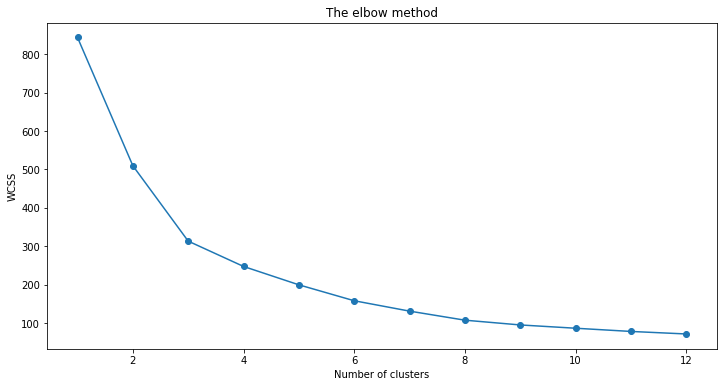

In [35]:
import pandas as pd
cluster_range=range(1,13)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

In [36]:
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

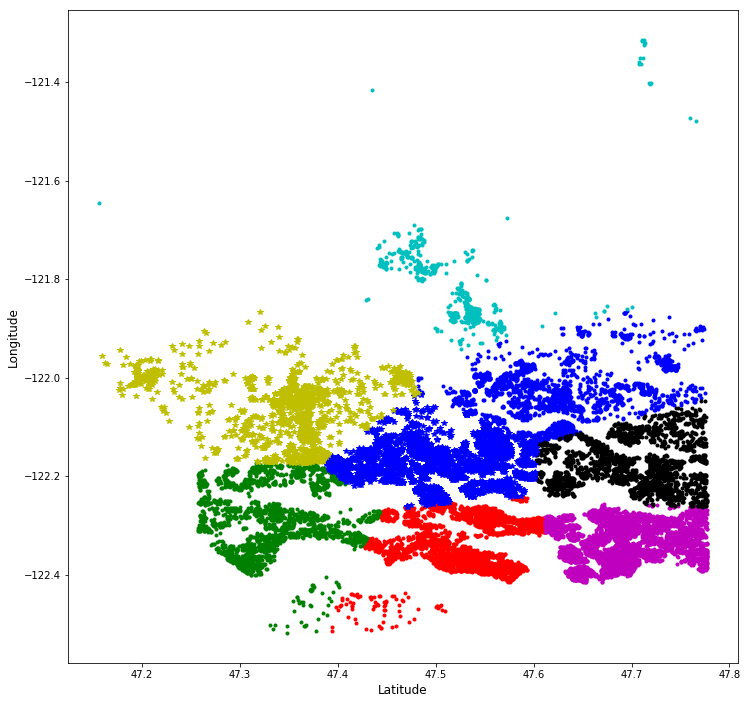

In [37]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','y*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.lat[cluster].values,X.long[cluster].values,ptsymb[i])
plt.show()

In [38]:
df1['area_clust']=kmeans.labels_

In [39]:
corr_matrix = df1.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
living_measure       0.702044
quality              0.667463
ceil_measure         0.605566
living_measure15     0.585374
furnished            0.565991
price_per_sqft       0.555064
room_bath            0.525134
sight                0.397346
basement             0.323837
room_bed             0.308338
lat                  0.306919
coast                0.266331
ceil                 0.256786
yr_renovated         0.126442
renov_flg            0.126101
total_area           0.104796
lot_measure          0.089655
lot_measure15        0.082456
yr_built             0.053982
condition            0.036392
long                 0.021571
transaction_year     0.003554
transaction_month   -0.010053
transaction_date    -0.014669
cid                 -0.016797
area_clust          -0.042485
zipcode             -0.053168
Age                 -0.053921
Name: price, dtype: float64

In [40]:
df2=df1.drop(750,axis=0)
filtered_df2 = df2[(df2['room_bed']>=33)]
filtered_df2

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,total_area,DateTime,Age,renov_flg,transaction_month,transaction_year,transaction_date,price_per_sqft,group,area_clust


In [41]:
filtered_df2 = df2[(df2['room_bath']<=0)]
df2 =df2.drop(filtered_df2.index,axis=0 )

In [42]:
filtered_df3 = df2[(df2['room_bath']<=0)]
filtered_df3

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,total_area,DateTime,Age,renov_flg,transaction_month,transaction_year,transaction_date,price_per_sqft,group,area_clust


In [43]:
df2.head().T

,0,1,2,3,4
cid,3034200666,8731981640,5104530220,6145600285,8924100111
price,808100,277500,404000,300000,699000
room_bed,4,4,3,2,2
room_bath,3.25,2.5,2.5,1,1.5
living_measure,3020,2550,2370,820,1400
lot_measure,13457,7500,4324,3844,4050
ceil,1,1,2,1,1
coast,0,0,0,0,0
sight,0,0,0,0,0
condition,5,3,3,4,4


In [44]:
df2['renov_age']=df2['transaction_year']-df2['yr_renovated']

In [45]:
df2.shape

(21602, 32)

In [46]:
df2.drop('price_per_sqft',axis=1,inplace=True)
df2.drop('DateTime',axis=1,inplace=True)
df2.drop('cid',axis=1,inplace=True)
#df2.drop('DateTime',axis=1,inplace=True)
df2.drop('long',axis=1,inplace=True)
df2.drop('lat',axis=1,inplace=True)
df2.drop('zipcode',axis=1,inplace=True)
df2.drop('yr_renovated',axis=1,inplace=True)
df2.drop('yr_built',axis=1,inplace=True)

In [47]:
df2.shape

(21602, 24)

In [48]:
df2.head().T

,0,1,2,3,4
price,808100,277500,404000,300000,699000
room_bed,4,4,3,2,2
room_bath,3.25,2.5,2.5,1,1.5
living_measure,3020,2550,2370,820,1400
lot_measure,13457,7500,4324,3844,4050
ceil,1,1,2,1,1
coast,0,0,0,0,0
sight,0,0,0,0,0
condition,5,3,3,4,4
quality,9,8,8,6,8


In [49]:
group_dummies  = pd.get_dummies(df2['group'])
df2 = df2.join(group_dummies)
df2.drop('group',axis=1,inplace=True)

In [50]:
df2.head().T

,0,1,2,3,4
price,808100.00,277500.0,404000.0,300000.0,699000.0
room_bed,4.00,4.0,3.0,2.0,2.0
room_bath,3.25,2.5,2.5,1.0,1.5
living_measure,3020.00,2550.0,2370.0,820.0,1400.0
lot_measure,13457.00,7500.0,4324.0,3844.0,4050.0
ceil,1.00,1.0,2.0,1.0,1.0
coast,0.00,0.0,0.0,0.0,0.0
sight,0.00,0.0,0.0,0.0,0.0
condition,5.00,3.0,3.0,4.0,4.0
quality,9.00,8.0,8.0,6.0,8.0


In [51]:
df2.loc[df2.renov_age>2000, 'renov_age'] = 0 

In [52]:
df2.shape

(21602, 26)

In [53]:
df2.head().T

,0,1,2,3,4
price,808100.00,277500.0,404000.0,300000.0,699000.0
room_bed,4.00,4.0,3.0,2.0,2.0
room_bath,3.25,2.5,2.5,1.0,1.5
living_measure,3020.00,2550.0,2370.0,820.0,1400.0
lot_measure,13457.00,7500.0,4324.0,3844.0,4050.0
ceil,1.00,1.0,2.0,1.0,1.0
coast,0.00,0.0,0.0,0.0,0.0
sight,0.00,0.0,0.0,0.0,0.0
condition,5.00,3.0,3.0,4.0,4.0
quality,9.00,8.0,8.0,6.0,8.0


In [54]:
df2.corr()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,Age,renov_flg,transaction_month,transaction_year,transaction_date,area_clust,renov_age,high_price_high_freq,high_price_low_freq,low_price
price,1.000000,0.316062,0.525896,0.701933,0.089696,0.256624,0.266398,0.397402,0.036207,0.667878,...,-0.053767,0.126117,-0.010044,0.003812,-0.014698,-0.042176,0.067183,0.271758,0.222463,-0.405213
room_bed,0.316062,1.000000,0.527208,0.592808,0.032889,0.182653,-0.006766,0.082593,0.024308,0.366609,...,-0.159856,0.019044,-0.001374,-0.008782,-0.009554,0.115804,-0.009876,-0.007327,-0.012301,0.014773
room_bath,0.525896,0.527208,1.000000,0.755787,0.087927,0.502455,0.063743,0.188385,-0.126227,0.665883,...,-0.507391,0.050077,0.007372,-0.026455,-0.005083,0.086465,-0.001580,0.037147,0.025181,-0.052198
living_measure,0.701933,0.592808,0.755787,1.000000,0.172952,0.353812,0.103855,0.284721,-0.059097,0.762854,...,-0.318375,0.055073,0.011949,-0.028923,-0.007362,0.094405,0.019303,0.052215,0.025148,-0.067115
lot_measure,0.089696,0.032889,0.087927,0.172952,1.000000,-0.005081,0.021605,0.074804,-0.008891,0.113969,...,-0.053023,0.007746,-0.002371,0.005481,0.000624,0.085584,0.014258,-0.113755,0.003842,0.110429
ceil,0.256624,0.182653,0.502455,0.353812,-0.005081,1.000000,0.023730,0.028740,-0.263944,0.458593,...,-0.489518,0.006301,0.014229,-0.022401,-0.006537,-0.038398,-0.001821,0.053386,0.058686,-0.088749
coast,0.266398,-0.006766,0.063743,0.103855,0.021605,0.023730,1.000000,0.401972,0.016642,0.082878,...,0.026102,0.093285,0.008133,-0.004162,0.010532,-0.030023,0.104204,0.001407,0.030078,-0.019755
sight,0.397402,0.082593,0.188385,0.284721,0.074804,0.028740,0.401972,1.000000,0.046108,0.251708,...,0.053715,0.104109,-0.005447,0.001287,0.011419,-0.036751,0.090638,0.048886,0.074217,-0.093769
condition,0.036207,0.024308,-0.126227,-0.059097,-0.008891,-0.263944,0.016642,0.046108,1.000000,-0.146317,...,0.360777,-0.060232,0.022228,-0.045707,-0.004645,0.069912,-0.006431,0.020513,0.046994,-0.049023
quality,0.667878,0.366609,0.665883,0.762854,0.113969,0.458593,0.082878,0.251708,-0.146317,1.000000,...,-0.447905,0.013916,0.008687,-0.030448,-0.012547,0.043181,-0.023008,0.126084,0.078309,-0.172799


In [55]:
x=df2.drop('price',axis=1)
y=df2.price

In [56]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
#y_scaled=StandardScaler().fit_transform(y[:,np.newaxis])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [59]:
import statsmodels.api as sm

In [60]:
lm = sm.OLS( y_train, x_train ).fit()

In [61]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:30:49   Log-Likelihood:            -2.2194e+05
No. Observations:               15121   AIC:                         4.439e+05
Df Residuals:                   15099   BIC:                         4.441e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.822e+04   6092.546     -4.632      0.000   -4.02e+04   -1.63e+04
x2          2.471e+04   8624.573      2.865      0.004    7807.282    4.16e+04
x3           8.61e+04   5477.405     15.718      0.000    7.54e+04    9.68e+04
x4           684.4184   3401.562      0.201      0.841   -5983.055    7351.892
x5         -6352.2215   6627.746     -0.958      0.338   -1.93e+04    6638.964
x6          5.113e+04   5025.637     10.173      0.000    4.13e+04     6.1e+04
x7          3.185e+04   5462.107      5.831      0.000    2.11e+04    4.26e+04
x8          1.628e+04   5198.266      3.133      0.002    6094.625    2.65e+04
x9          8.569e+04   1.04e+04      8.236      0.000    6.53e+04    1.06e+05
x10         8.123e+04   5844.739     13.898      0.000    6.98e+04    9.27e+04
x11         2.668e+04   5251.399      5.081      0.000    1.64e+04     3.7e+04
x12         2.346e+04   7861.863      2.984      0.003    8046.601    3.89e+04
x13        -7773.4120   6820.447     -1.140      0.254   -2.11e+04    5595.490
x14         1.264e+04   7838.171      1.613      0.107   -2724.679     2.8e+04
x15         2581.9397   3380.231      0.764      0.445   -4043.722    9207.602
x16         6.522e+04   7121.579      9.158      0.000    5.13e+04    7.92e+04
x17         2.044e+04   7236.656      2.824      0.005    6253.483    3.46e+04
x18        -1160.6539   7524.468     -0.154      0.877   -1.59e+04    1.36e+04
x19         9908.5932   7530.051      1.316      0.188   -4851.218    2.47e+04
x20        -3321.9331   4703.970     -0.706      0.480   -1.25e+04    5898.419
x21         1.674e+04   5207.095      3.215      0.001    6536.754    2.69e+04
x22        -1.709e+04   7071.909     -2.417      0.016    -3.1e+04   -3230.791
x23         3.897e+04   2933.082     13.288      0.000    3.32e+04    4.47e+04
x24         4.931e+04   4102.997     12.018      0.000    4.13e+04    5.74e+04
x25        -6.874e+04   3190.610    -21.544      0.000    -7.5e+04   -6.25e+04
==============================================================================
Omnibus:                    13137.882   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1584598.149
Skew:                           3.630   Prob(JB):                         0.00
Kurtosis:                      52.622   Cond. No.                     6.36e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
y_predict = lm.predict( x_test )

In [63]:
from statsmodels.tools.eval_measures import rmse

In [64]:
rmse( y_predict, y_test )

576005.8962751173

In [65]:
residuals = y_test - y_predict

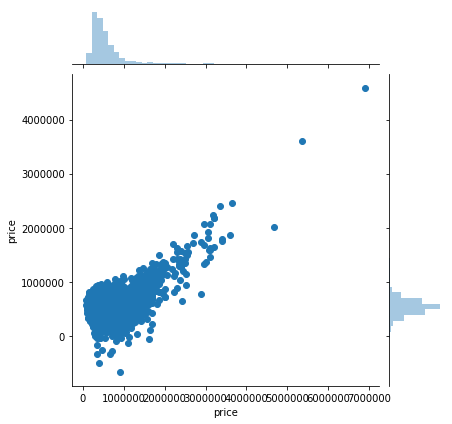

In [66]:
sns.jointplot( y_test, residuals )

In [67]:
import pylab
import scipy.stats as stats

In [68]:
from scipy.stats import normaltest

In [69]:
normaltest( residuals )

NormaltestResult(statistic=5804.230942970744, pvalue=0.0)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
data_mat = df2[['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'Age', 'renov_flg', 'transaction_month',
       'transaction_year', 'transaction_date', 'area_clust', 'renov_age',
       'high_price_high_freq', 'high_price_low_freq', 'low_price']].as_matrix()

In [72]:
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]

In [73]:
vif_factors = pd.DataFrame()

In [74]:
vif_factors['column'] = ['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'Age', 'renov_flg', 'transaction_month',
       'transaction_year', 'transaction_date', 'area_clust', 'renov_age',
       'high_price_high_freq', 'high_price_low_freq', 'low_price']
vif_factors['vif'] = vif

In [75]:
vif_factors

,column,vif
0,room_bed,1.718641e+00
1,room_bath,3.416576e+00
2,living_measure,inf
3,lot_measure,inf
4,ceil,2.031253e+00
5,coast,1.207194e+00
6,sight,1.407887e+00
7,condition,1.259666e+00
8,quality,4.940326e+00
9,ceil_measure,inf


In [76]:
#applying log transformation
df2['price'] = np.log(df['price'])
#data transformation
df2['living_measure'] = np.log(df['living_measure'])
#data transformation
df2['ceil_measure'] = np.log(df['ceil_measure'])

In [77]:
x=df2.drop('price',axis=1)
y=df2.price

In [78]:
x_scaled = StandardScaler().fit_transform(x)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [80]:
lms = sm.OLS( y_train, x_train ).fit()
lms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.003
Date:                Sun, 16 Jun 2019   Prob (F-statistic):              0.457
Time:                        20:30:55   Log-Likelihood:                -60295.
No. Observations:               15121   AIC:                         1.206e+05
Df Residuals:                   15097   BIC:                         1.208e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0445      0.144      0.308      0.758      -0.239       0.328
x2            -0.1723      0.198     -0.868      0.385      -0.561       0.217
x3             0.6017      0.619      0.972      0.331      -0.612       1.816
x4            13.2642     22.244      0.596      0.551     -30.337      56.865
x5             0.1192      0.152      0.783      0.434      -0.179       0.418
x6             0.0582      0.117      0.498      0.618      -0.171       0.287
x7            -0.0153      0.128     -0.120      0.905      -0.265       0.235
x8             0.0631      0.120      0.525      0.599      -0.172       0.298
x9             0.2213      0.239      0.925      0.355      -0.248       0.690
x10           -0.2689      0.665     -0.404      0.686      -1.573       1.035
x11           -0.0306      0.372     -0.082      0.934      -0.760       0.698
x12            0.1490      0.181      0.821      0.412      -0.207       0.505
x13           -0.1022      0.163     -0.626      0.531      -0.422       0.218
x14           -0.0304      0.181     -0.167      0.867      -0.386       0.325
x15          -13.3311     22.325     -0.597      0.550     -57.091      30.429
x16           -0.0458      0.163     -0.280      0.779      -0.366       0.274
x17            0.1522      0.166      0.919      0.358      -0.172       0.477
x18           -0.0970      0.171     -0.567      0.571      -0.432       0.238
x19           -0.1607      0.172     -0.937      0.349      -0.497       0.176
x20           -0.0244      0.107     -0.229      0.819      -0.234       0.185
x21           -0.0351      0.120     -0.294      0.769      -0.270       0.199
x22           -0.0075      0.160     -0.047      0.962      -0.321       0.306
x23            0.0413      0.067      0.616      0.538      -0.090       0.173
x24            0.1567      0.094      1.669      0.095      -0.027       0.341
x25           -0.1366      0.073     -1.878      0.060      -0.279       0.006
==============================================================================
Omnibus:                     2835.228   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18827.572
Skew:                           0.737   Prob(JB):                         0.00
Kurtosis:                       8.264   Cond. No.                     7.63e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
y_predict = lms.predict( x_test )

In [82]:
rmse( y_predict, y_test )

13.071378957023704

In [83]:
data_mat = df2[['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'Age', 'renov_flg', 'transaction_month',
       'transaction_year', 'transaction_date', 'area_clust', 'renov_age',
       'high_price_high_freq', 'high_price_low_freq', 'low_price']].as_matrix()
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]
vif_factors = pd.DataFrame()
vif_factors['column'] = ['room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'Age', 'renov_flg', 'transaction_month',
       'transaction_year', 'transaction_date', 'area_clust', 'renov_age',
       'high_price_high_freq', 'high_price_low_freq', 'low_price']
vif_factors['vif'] = vif
vif_factors

,column,vif
0,room_bed,1.869221e+00
1,room_bath,3.429747e+00
2,living_measure,3.296959e+01
3,lot_measure,4.114892e+04
4,ceil,2.084253e+00
5,coast,1.207864e+00
6,sight,1.429146e+00
7,condition,1.266386e+00
8,quality,5.051854e+00
9,ceil_measure,3.919323e+01


In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test) #fitted values
pred

array([13.37205605, 13.04564003, 12.86766152, ..., 13.17137246,
       12.83104043, 12.48069863])

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,pred)

0.8009230897431916

In [88]:
lms.rsquared

0.0015926415177696107

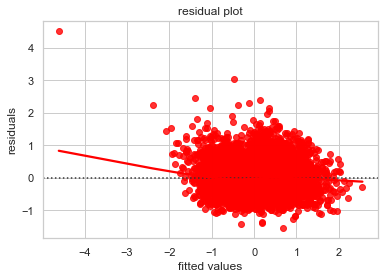

In [89]:
fitted=lms.fittedvalues
residuals=lms.resid
sns.set(style="whitegrid")
ax=sns.residplot(fitted,residuals,color="red",lowess=True)
ax.set(xlabel='fitted values',ylabel="residuals",title="residual plot")
plt.show()

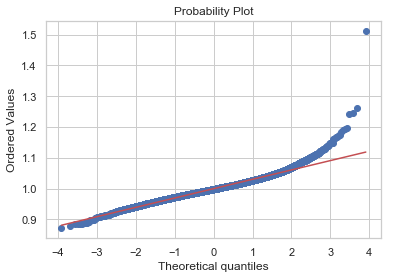

In [90]:
st_residual=lms.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

In [91]:
from scipy.stats import shapiro

In [92]:
test=shapiro(st_residual)
test
if test[1]<0.05:
    print("reject null hypothysis")
else:
    print("fail to reject null hypothysis")

reject null hypothysis
